# Introduction to Options

Options are financial derivatives that give buyers the right, but not the obligation, to buy or sell an underlying asset at a specified price, known as the strike price, before a certain expiration date. 

## Long and Short Positions

- **Long Position (Buying an Option):** The buyer of the option holds a long position. They have the right to exercise the option.
- **Short Position (Selling/Writing an Option):** The seller or writer of the option holds a short position. They have the obligation to fulfill the contract if the buyer exercises the option.

## Call and Put Options

- **Call Option:** Gives the holder the right to buy the underlying asset.
- **Put Option:** Gives the holder the right to sell the underlying asset.

## In the Money (ITM), At the Money (ATM), Out of the Money (OTM)

- **In the Money:** 
  - For a call option, when the underlying asset price is above the strike price.
  - For a put option, when the underlying asset price is below the strike price.
- **At the Money:** The underlying asset's price is equal to the strike price.
- **Out of the Money:**
  - For a call option, when the underlying asset price is below the strike price.
  - For a put option, when the underlying asset price is above the strike price.

## Expiration Date

- **Expiration Date:** The date on which the option expires. If the option is not exercised by this date, it becomes worthless.

## Premium

- **Premium:** The price paid by the buyer to the seller to acquire the rights that the option grants.

## Profit Equations for Options

The profit for options can be calculated as follows:

- **Call Option Profit:**
  $$\text{Profit} = \max(S - K, 0) - \text{Premium}$$
  Where \(S\) is the spot price of the underlying asset and \(K\) is the strike price.

- **Put Option Profit:**
  $$\text{Profit} = \max(K - S, 0) - \text{Premium}$$
  Where \(S\) is the spot price of the underlying asset and \(K\) is the strike price.



## Scenario 1:
An investor buys an at-the-money put option for Apple Inc. (AAPL), currently trading at $150. The call option costs a premium of $10. The option expires in three months.

### Details:
- **Underlying Asset Price (S)**: $150
- **Strike Price (K)**: $150
- **Premium Paid**: $10

### Profit Calculation:
At expiration, AAPL is trading at $165. The option is not worth exercising since the market price is above the strike price.

- **Intrinsic Value**: max(K - S, 0) = max(150 - 165, 0) = 0
- **Profit**: Intrinsic Value - Premium = $0 - $10 = -$10

The investor incurs a loss equal to the premium of $10.


## Scenario 2:
A daring trader, inspired by Dr. Ludwig talking about yachts, buys a far out-of-the-money call option on GameStop (GME), currently trading at $40. The call option has a strike price of $100, costs a premium of $0.10, and expires in two weeks. The trader spends $2000 to buy 20,000 of these call options.

### Details:
- **Underlying Asset Price (S)**: $40
- **Strike Price (K)**: $100
- **Premium Paid**: $0.10

### Profit Calculation:
Miraculously, following a tweet from a famous billionaire about loving video games, GME skyrockets to $125 at expiration.

- **Intrinsic Value**: max(S - K, 0) = max(125 - 100, 0) = $25
- **Profit**: Intrinsic Value - Premium = $25 - $0.10 = $24.90

So the trader in total recieves $24.90*20,000=$498,000 in profit.




## Problem 1



In the context of options trading, a portfolio can be constructed using various combinations of call and put options. The profit or loss of these portfolios is evaluated at expiration time \( t = T \). Below, we discuss several types of option portfolios, their profit calculations, and the market expectations that might lead an investor to adopt each strategy.

Let $ C_E $ denote a call option with strike price $ E $, and $ P_E $ denote a put option with the same strike price. A negative sign (e.g., $ -C_E $) indicates a short position in the option.



1. **Long Call**: $\text{Port} = C_E $

2. **Short Call**: $ \text{Port} = -C_E $
 
3. **Long Put**: $ \text{Port} = P_E $
   
4. **Short Put**: $ \text{Port} = -P_E $
  
5. **Long Straddle**: $ \text{Port} = P_E + C_E $
  
6. **Short Straddle**: $ \text{Port} = -P_E - C_E $
   
7. **Long Strangle**: $ \text{Port} = P_{E1} + C_{E2} $
  
8. **Short Butterfly**: $ \text{Port} = -C_{E1} + 2C_{E2} - C_{E3} $
  
9. **Long Butterfly**: $ \text{Port} = C_{E1} - 2C_{E2} + C_{E3} $
   
10. **Short Condor**: $ \text{Port} = -C_{E1} + C_{E2} + C_{E3} - C_{E4} $

11. **Long Condor**: $ \text{Port} = C_{E1} - C_{E2} - C_{E3} + C_{E4} $




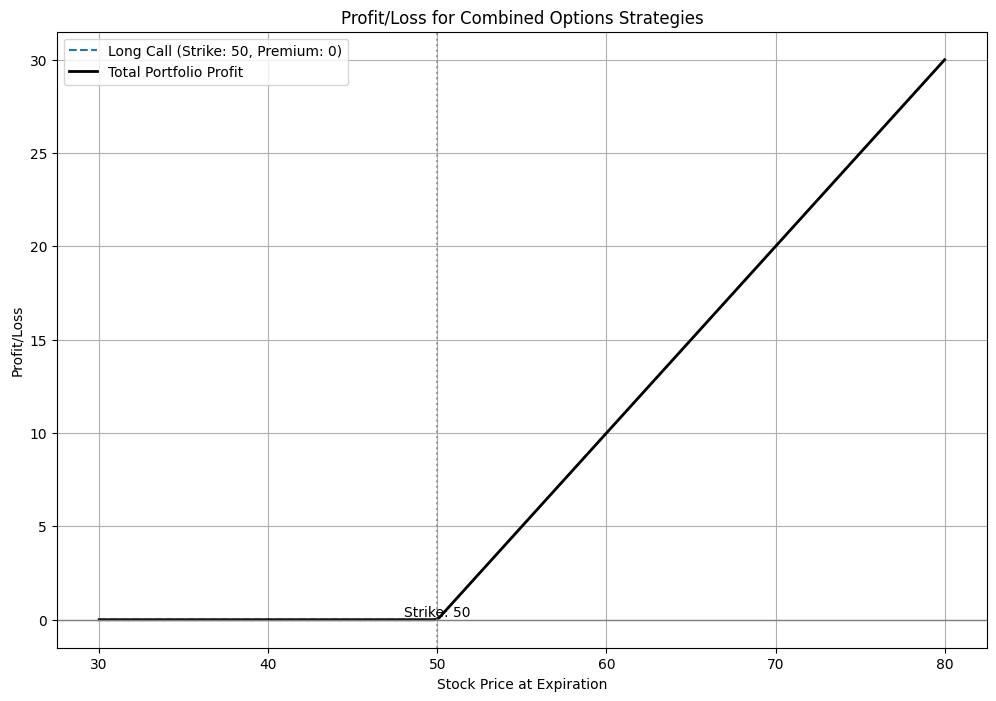

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_option_payoff(strategy, strike, premium, stock_prices):
    """
    Calculate the payoff for a single option based on the strategy.
    """
    if strategy == "long_call":
        payoff = np.maximum(stock_prices - strike, 0) - premium
    elif strategy == "short_call":
        payoff = -np.maximum(stock_prices - strike, 0) + premium
    elif strategy == "long_put":
        payoff = np.maximum(strike - stock_prices, 0) - premium
    elif strategy == "short_put":
        payoff = -np.maximum(strike - stock_prices, 0) + premium
    else:
        raise ValueError("Invalid strategy")
    return payoff

def plot_options_strategies(strategies, stock_price_range):
    """
    Plot the profit/loss for a combination of option strategies.
    """
   
    stock_prices = np.linspace(stock_price_range[0], stock_price_range[1], 200)
    total_payoff = np.zeros_like(stock_prices)
    plt.figure(figsize=(12, 8))

    # Plotting each strategy's payoff separately
    for i, strategy in enumerate(strategies):
        payoff = calculate_option_payoff(strategy['type'], strategy['strike'], strategy['premium'], stock_prices)
        total_payoff += payoff
        plt.plot(stock_prices, payoff, label=f"{strategy['type'].replace('_', ' ').title()} (Strike: {strategy['strike']}, Premium: {strategy['premium']})", linestyle='--')

    # Plotting the total portfolio payoff
    plt.plot(stock_prices, total_payoff, label="Total Portfolio Profit", color='black', linewidth=2)

    # Adding annotations for strike prices and break-even points
    for strategy in strategies:
        plt.axvline(x=strategy['strike'], color='grey', linestyle=':', alpha=0.7)
        plt.text(strategy['strike'], 0, f"Strike: {strategy['strike']}", horizontalalignment='center', verticalalignment='bottom')

    # Setting up the graph with labels, legends, and grid
    plt.axhline(0, color='gray', lw=1)
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit/Loss")
    plt.title("Profit/Loss for Combined Options Strategies")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
strategies = [
    {"type": "long_call", "strike": 50, "premium": 0},
   
    
]

plot_options_strategies(strategies, (30, 80))

## Problem 2

This is another question about portfolios. Here, for a given shape of the profit
curve, design the portfolio.

(a) Construct a portfolio using only Calls where, at time t = T , the profit line
is horizontal until price $60. At that point, it has slope 3 until price $70.
Then, the line has slope 2 until price $100. Next, it has slope zero until
price $110. It then has a slope of −1 until $120. After that, it has slope
zero.

(b) Construct a portfolio with the above behavior but using only Puts.

(c) Construct a portfolio with the above behavior using both Puts and Calls